In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/Users/blotenko/Downloads/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='price', ylabel='id'>,
        <Axes: xlabel='bedrooms', ylabel='id'>,
        <Axes: xlabel='bathrooms', ylabel='id'>,
        <Axes: xlabel='sqft_living', ylabel='id'>,
        <Axes: xlabel='sqft_lot', ylabel='id'>,
        <Axes: xlabel='floors', ylabel='id'>,
        <Axes: xlabel='waterfront', ylabel='id'>,
        <Axes: xlabel='view', ylabel='id'>,
        <Axes: xlabel='condition', ylabel='id'>,
        <Axes: xlabel='grade', ylabel='id'>,
        <Axes: xlabel='sqft_above', ylabel='id'>,
        <Axes: xlabel='sqft_basement', ylabel='id'>,
        <Axes: xlabel='yr_built', ylabel='id'>,
        <Axes: xlabel='yr_renovated', ylabel='id'>,
        <Axes: xlabel='zipcode', ylabel='id'>,
        <Axes: xlabel='lat', ylabel='id'>,
        <Axes: xlabel='long', ylabel='id'>,
        <Axes: xlabel='sqft_living15', ylabel='id'>,
        <Axes: xlabel='sqft_lot15', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='price'

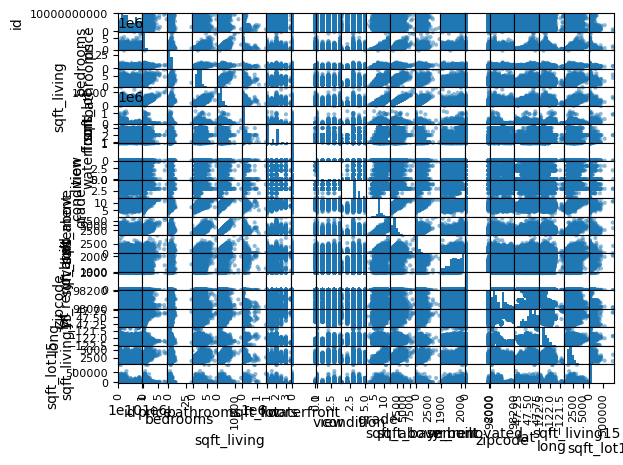

In [5]:
scatter_matrix(df)

In [6]:
num_features = ['price', 'sqft_living', 'yr_built', 'yr_renovated',  'bedrooms', 'bathrooms']
cat_features = ['waterfront', 'view', 'condition' ]

In [7]:
grades = [13, 11, 9, 7, 5, 1]
def grades_class(Ys):
    grades_clases = np.zeros_like(Ys, dtype=int)
    for i, upper_bound in enumerate(grades):
        grades_clases[Ys <= upper_bound] = i
    return grades_clases

In [8]:
df['GradeClass'] = grades_class(df['grade'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,GradeClass
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,3
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2


In [9]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [10]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

score_transform = Pipeline([
    ('scaler', StandardScaler()),
])


# _, c1 = train_df.shape
X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['grade']])

X_test = pipeline.fit_transform(test_df)

Y_test = score_transform.transform(test_df[['grade']])

In [11]:
X_train, Y_train

(array([[-0.27830924, -1.19533866,  1.33050886, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.41959036,  1.17407764,  0.95657966, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.53453853,  1.29363535,  0.75261828, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-0.63683806, -0.31495921,  0.31070196, ...,  1.        ,
          0.        ,  0.        ],
        [-0.14967676, -0.24974592, -0.47115   , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.98064691,  1.76099728,  0.71862472, ...,  1.        ,
          0.        ,  0.        ]]),
 array([[ 0.29431948],
        [ 1.99910467],
        [ 1.14671208],
        ...,
        [-0.55807312],
        [-0.55807312],
        [ 1.99910467]]))

In [12]:
def get_grade(model):
    Y_hat = model.predict(X_test)
    Y_pred = score_transform.inverse_transform(Y_hat)
    Y_target = score_transform.inverse_transform(Y_test)
    return mean_squared_error(Y_pred.round(), Y_target)

In [13]:
model = LinearRegression()
model.fit(X_train, Y_train)
get_grade(model)

0.4991903770529725

In [ ]:
model = Pipeline([
    ("kmeans", KMeans(n_clusters=5, n_init=1)),
    ("log_reg", LinearRegression()),
])

model.fit(X_train, Y_train)
get_grade(model)